In [1]:
import csv
import spacy
import numpy as np
nlp=spacy.load('es_core_news_md')
pathgold_task2='GOLD/GOLD_SUBS.csv'
pathdemograph='CORPUS_DEMOGRAPH_EVAL.csv'
pathtask2='CORPUS_SUBS_EVAL.csv'

In [2]:
def procesartasks(path):
    tsvin = open(path, "rt")
    tsvin = csv.reader(tsvin, delimiter=';')
    listatask1=list()
    for row in tsvin:
        listatemp=list()
        for element in row:
            if element != '':
                listatemp.append(element)
        listatask1.append(listatemp)
                
    return listatask1 

In [25]:
demographic=procesartasks(pathdemograph)
listatask2=procesartasks(pathtask2)
listagoldtask2=procesartasks(pathgold_task2)

In [26]:
listausuarios=list()
listausuariosmay=list()
listausuariosdic=list()
listausuariosctr=list()
for row in demographic:
    listausuarios.append([row[0],row[5]])
    if row[5]=='0':
        listausuariosmay.append(row[0])
    if row[5]=='1':
        listausuariosdic.append(row[0])
    if row[5]=='2':
        listausuariosctr.append(row[0])

In [33]:
dicmay=dict()
dicdisc=dict()
dicctr=dict()
for row in listatask2:   
    if row[0] in listausuariosmay:
        dicmay[row[0]]=0
    if row[0] in listausuariosdic:
        dicdisc[row[0]]=0
    if row[0] in listausuariosctr:
        dicctr[row[0]]=0

In [34]:
nlistausuariosmay=list()
nlistausuariosdic=list()
nlistausuariosctr=list()
nlistausuariosmay=dicmay.keys()
nlistausuariosdic=dicdisc.keys()
nlistausuariosctr=dicctr.keys()

In [35]:
nlistausuariosctr

dict_keys(['4', '5', '6', '7', '11', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52'])

In [36]:
nlistausuariosdic

dict_keys(['12', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '41'])

In [37]:
nlistausuariosmay

dict_keys(['2', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25', '26', '42'])

In [208]:
def evaluarscoresporsinónimoGRAFv2(listatask2v2):
    temporalMAY1=0
    temporalMAY2=0
    temporalMAY3=0
    temporalDISC1=0
    temporalDISC2=0
    temporalDISC3=0
    temporalCTR1=0
    temporalCTR2=0
    temporalCTR3=0
    lista=list()
    for cont in range(16):
        temporalMAY1=0
        temporalMAY2=0
        temporalMAY3=0
        temporalDISC1=0
        temporalDISC2=0
        temporalDISC3=0
        temporalCTR1=0
        temporalCTR2=0
        temporalCTR3=0
        for row in listatask2v2:
            usuario=row[0][0]
            if usuario in nlistausuariosmay:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if score1=='1' or score2=='1'or score3=='1':
                        temporalMAY1+=1
            if usuario in nlistausuariosdic:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if score1=='1'or score2=='1' or score3=='1':
                        temporalDISC1+=1
            if usuario in nlistausuariosctr:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if score1=='1'or score2=='1'or score3=='1':
                        temporalCTR1+=1
                
        lista.append([temporalMAY1,temporalDISC1,temporalCTR1])
   
    return lista

### AT LEAST ONE CANDIDATE RATED AS CORRECT

In [210]:
#NUMERO DE USUARIOS DONDE AL MENOS UNA VEZ CALIFICARON COMO ADECUADO UN REEMPLAZO POR ORACIÓN / PRIMERA COLUMNA =mayores, SEGUNDA COLUMNA= discapacidad, TERCERA COLUMNA = control
listausuarioscontador=evaluarscoresporsinónimoGRAFv2(listatask2v2)
listausuarioscontador.pop(0)

[0, 0, 0]

In [211]:
listausuarioscontador

[[15, 15, 15],
 [15, 15, 14],
 [15, 15, 14],
 [15, 15, 15],
 [14, 15, 14],
 [15, 15, 15],
 [14, 15, 14],
 [14, 15, 13],
 [15, 14, 14],
 [15, 15, 15],
 [15, 14, 14],
 [15, 15, 15],
 [14, 15, 14],
 [15, 15, 13],
 [15, 14, 14]]

In [212]:
def evaluarscoresporsinónimoGRAFv4(listatask2v2):
    temporalMAY1=0
    temporalMAY2=0
    temporalMAY3=0
    temporalDISC1=0
    temporalDISC2=0
    temporalDISC3=0
    temporalCTR1=0
    temporalCTR2=0
    temporalCTR3=0
    lista=list()
    for cont in range(16):
        temporalMAY1=0
        temporalMAY2=0
        temporalMAY3=0
        temporalDISC1=0
        temporalDISC2=0
        temporalDISC3=0
        temporalCTR1=0
        temporalCTR2=0
        temporalCTR3=0
        for row in listatask2v2:
            usuario=row[0][0]
            if usuario in nlistausuariosmay:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if (int(score1)+int(score2)+int(score3))>=2:
                        temporalMAY1+=1
            if usuario in nlistausuariosdic:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if (int(score1)+int(score2)+int(score3))>=2:
                        temporalDISC1+=1
            if usuario in nlistausuariosctr:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if (int(score1)+int(score2)+int(score3))>=2:
                        temporalCTR1+=1
                
        lista.append([temporalMAY1,temporalDISC1,temporalCTR1])
   
    return lista

### AT LEAST TWO CANDIDATES RATED AS CORRECT

In [213]:
#NUMERO DE USUARIOS DONDE SE CALIFICARON COMO ADECUADO A DOS REEMPLAZOS POR ORACIÓN / PRIMERA COLUMNA =mayores, SEGUNDA COLUMNA= discapacidad, TERCERA COLUMNA = control
listausuarioscontador3=evaluarscoresporsinónimoGRAFv4(listatask2v2)
listausuarioscontador3.pop(0)

[0, 0, 0]

In [214]:
listausuarioscontador3

[[11, 12, 13],
 [8, 10, 7],
 [10, 9, 9],
 [12, 10, 12],
 [12, 11, 10],
 [11, 11, 14],
 [10, 11, 10],
 [10, 11, 5],
 [11, 10, 11],
 [13, 12, 11],
 [12, 11, 13],
 [12, 11, 13],
 [10, 10, 7],
 [9, 11, 8],
 [11, 6, 9]]

In [320]:
def evaluarscoresporsinónimoGRAFv3(listatask2v2):
    temporalMAY1=0
    temporalMAY2=0
    temporalMAY3=0
    temporalDISC1=0
    temporalDISC2=0
    temporalDISC3=0
    temporalCTR1=0
    temporalCTR2=0
    temporalCTR3=0
    lista=list()
    for cont in range(16):
        temporalMAY1=0
        temporalMAY2=0
        temporalMAY3=0
        temporalDISC1=0
        temporalDISC2=0
        temporalDISC3=0
        temporalCTR1=0
        temporalCTR2=0
        temporalCTR3=0
        for row in listatask2v2:
            usuario=row[0][0]
            if usuario in nlistausuariosmay:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if score1=='1' and score2=='1'and score3=='1':
                        temporalMAY1+=1
            if usuario in nlistausuariosdic:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if score1=='1'and score2=='1' and score3=='1':
                        temporalDISC1+=1
            if usuario in nlistausuariosctr:
                if row[1]==cont:
                    score1=row[0][1]
                    score2=row[0][2]
                    score3=row[0][3]
                    if score1=='1'and score2=='1'and score3=='1':
                        temporalCTR1+=1
                
        lista.append([temporalMAY1,temporalDISC1,temporalCTR1])
   
    return lista

### ALL CANDIDATES RATED AS CORRECT

In [321]:
#NUMERO DE USUARIOS DONDE SE CALIFICARON COMO ADECUADO A TODOS LOS REEMPLAZOS POR ORACIÓN / PRIMERA COLUMNA =mayores, SEGUNDA COLUMNA= discapacidad, TERCERA COLUMNA = control
listausuarioscontador2=evaluarscoresporsinónimoGRAFv3(listatask2v2)
listausuarioscontador2.pop(0)

[0, 0, 0]

In [322]:
listausuarioscontador2

[[7, 9, 5],
 [7, 7, 3],
 [8, 8, 4],
 [8, 7, 8],
 [8, 10, 5],
 [11, 9, 9],
 [8, 7, 2],
 [7, 8, 2],
 [8, 7, 5],
 [10, 10, 5],
 [10, 8, 6],
 [10, 9, 7],
 [9, 8, 4],
 [9, 5, 4],
 [9, 5, 3]]

### PLOTTING DIFFERENT FIGURES

In [325]:
listasynv2=list()
for item in listasyn:
    if item[1]=='1' or item[2]=='1' or item[3]=='1':
        listasynv2.append([item[0],'1',item[4],item[5],item[6],item[7],item[8]])
    else:
        listasynv2.append([item[0],'0',item[4],item[5],item[6],item[7],item[8]])

In [328]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df=pd.DataFrame(listasynv2)
df=df.rename(columns={0:"ID",1:'CANDIDATOS',2:'GENERO',3:'EDAD',4:'ESTUDIOS',5:'LECTURA',6:'ESTADO'})

In [329]:
dfnew=(df
       .groupby(['ESTUDIOS','CANDIDATOS'])
       .ESTADO
       .value_counts()
       .unstack()
       .fillna(0)
)

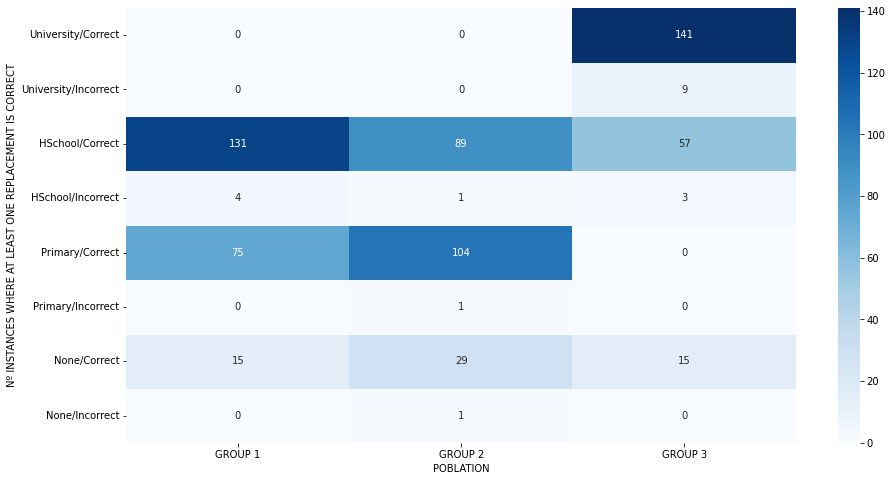

In [330]:
X_axis=['GROUP 1','GROUP 2','GROUP 3']
Y_axis=['None/Incorrect','None/Correct','Primary/Incorrect','Primary/Correct','HSchool/Incorrect','HSchool/Correct','University/Incorrect','University/Correct']
heat_map = sb.heatmap(dfnew,xticklabels=X_axis,yticklabels=Y_axis,cmap='Blues',fmt='.0f',annot=True)
plt.xlabel("POBLATION")
plt.ylabel("Nº INSTANCES WHERE AT LEAST ONE REPLACEMENT IS CORRECT")
plt.ylim(0,8)
plt.gcf().set_size_inches(15, 8)
plt.show()

# SIGNIFICANCE TESTS

## FISHER TEST

In [223]:
listausuariosm=list(nlistausuariosmay)
listausuariosd=list(nlistausuariosdic)
listausuariosc=list(nlistausuariosctr)

In [280]:
listausuarios=listausuariosm+listausuariosd+listausuariosc

In [283]:
listasyn=list()
for user in listausuarios:
    for items in listatask2:
        if str(user)==items[0]:
            listasyn.append([user,items[1],items[2],items[3]])

In [286]:
for i in range(len(listasyn)):
    for j in range (len(demographic)):
        if str(listasyn[i][0])==demographic[j][0]:
            listasyn[i].append(demographic[j][1])
            listasyn[i].append(demographic[j][2])
            listasyn[i].append(demographic[j][3])
            listasyn[i].append(demographic[j][4])
            listasyn[i].append(demographic[j][5])

In [287]:
def fisherlist(temporallist):
    listafishersyn2=list()
    #print(listaestudios)
    for item in temporallist:
        if(item[1]=='1' or item[2]=='1' or item[3]=='1'):
            listafishersyn2.append([item[0],'1',item[8]])
        else:
            listafishersyn2.append([item[0],'0',item[8]])
    return listafishersyn2

In [288]:
listafisher=list()
listafisher=fisherlist(listasyn)

In [289]:
len(listafisher)

675

In [298]:
contadoraprobar1=0
contadordenegar1=0
contadoraprobar2=0
contadordenegar2=0
contadoraprobar3=0
contadordenegar3=0
fishersimplificado=list()
for element in listafisher:
    if element[1]=='1' and element[2]=='0':
        contadoraprobar1+=1
    elif element[1]=='0' and element[2]=='0':
        contadordenegar1+=1
    elif element[1]=='1' and element[2]=='1':
        contadoraprobar2+=1
    elif element[1]=='0' and element[2]=='1':
        contadordenegar2+=1
    elif element[1]=='1' and element[2]=='2':
        contadoraprobar3+=1
    elif element[1]=='0' and element[2]=='2':
        contadordenegar3+=1
        
    else:
        print(element)
#fishersimplificado.append([contadoraprobar1,contadordenegar1])  
fishersimplificado.append([contadoraprobar2,contadordenegar2])
fishersimplificado.append([contadoraprobar3,contadordenegar3])

In [299]:
arrfisher = np.array(fishersimplificado)

In [300]:
arrfisher

array([[222,   3],
       [213,  12]])

In [293]:
import scipy.stats as stats
#older and people with int disabilities
print(stats.fisher_exact(arrfisher))

(0.7466216216216216, 1.0)


In [297]:
import scipy.stats as stats
#older and control
print(stats.fisher_exact(arrfisher))

(3.112676056338028, 0.07163617230922947)


In [324]:
#people with int disabilities y control
print(stats.fisher_exact(arrfisher))

(4.169014084507042, 0.03222808388561305)


# KRUSKALL : Search for significance between all groups

In [302]:
group1may=list()
group2disc=list()
group3ctr=list()
for i in range(len(listafisher)):
    if listafisher[i][2]=='0':
        group1may.append(listafisher[i][1])
    if listafisher[i][2]=='1':
        group2disc.append(listafisher[i][1])
    if listafisher[i][2]=='2':
        group3ctr.append(listafisher[i][1])

In [303]:
stats.kruskal(group1may, group2disc, group3ctr)

KruskalResult(statistic=7.895057766366699, pvalue=0.019302341229829968)

# --CHI CUADRADO (EDUCATION LEVEL: OLDER)

In [304]:
listachicuadradodemographic=list()
for element in listasyn:
    if str(element[0]) not in nlistausuariosdic and str(element[0]) not in nlistausuariosctr:
        listachicuadradodemographic.append(element)

In [131]:
listachicuadradodemographic

[['2', '0', '1', '0', '1', '70', '1', '2', '0'],
 ['2', '1', '0', '0', '1', '70', '1', '2', '0'],
 ['2', '0', '1', '0', '1', '70', '1', '2', '0'],
 ['2', '0', '0', '1', '1', '70', '1', '2', '0'],
 ['2', '1', '0', '0', '1', '70', '1', '2', '0'],
 ['2', '0', '1', '0', '1', '70', '1', '2', '0'],
 ['2', '0', '1', '0', '1', '70', '1', '2', '0'],
 ['2', '0', '1', '0', '1', '70', '1', '2', '0'],
 ['2', '0', '0', '1', '1', '70', '1', '2', '0'],
 ['2', '0', '1', '0', '1', '70', '1', '2', '0'],
 ['2', '1', '0', '0', '1', '70', '1', '2', '0'],
 ['2', '1', '0', '0', '1', '70', '1', '2', '0'],
 ['2', '1', '0', '0', '1', '70', '1', '2', '0'],
 ['2', '1', '0', '0', '1', '70', '1', '2', '0'],
 ['2', '0', '1', '0', '1', '70', '1', '2', '0'],
 ['13', '0', '1', '0', '0', '71', '2', '0', '0'],
 ['13', '1', '0', '0', '0', '71', '2', '0', '0'],
 ['13', '0', '0', '1', '0', '71', '2', '0', '0'],
 ['13', '0', '0', '1', '0', '71', '2', '0', '0'],
 ['13', '0', '1', '0', '0', '71', '2', '0', '0'],
 ['13', '0', '0

In [305]:
len(listachicuadradodemographic)

225

In [307]:
def chicuadradolist(temporallist):
    listaestudiossyn=list()
    listaestudios=list(range(0,4))
    #print(listaestudios)
    for element in listaestudios:
        for item in temporallist:
            if str(element)==item[6]:
                if(item[1]=='1' or item[2]=='1'or item[3]=='1'):
                    listaestudiossyn.append([item[0],element,'1'])
                else:
                    listaestudiossyn.append([item[0],element,'0'])
    return listaestudiossyn

In [308]:
listachicuadrado=list()
listachicuadrado=chicuadradolist(listachicuadradodemographic)

In [309]:
listaestudios=list(range(0,3))
contadoraprobar=0
contadordenegar=0
listachicuadradosimplificado=list()
for item in listaestudios:
    contadoraprobar=0
    contadordenegar=0
    for element in listachicuadrado:
        if item==element[1]:
            if element[2]=='1':
                contadoraprobar+=1
            else:
                contadordenegar+=1
    listachicuadradosimplificado.append([contadoraprobar,contadordenegar])  

In [310]:
listachicuadradosimplificado

[[15, 0], [75, 0], [131, 4]]

In [311]:
arrchicuadrado = np.array(listachicuadradosimplificado)

In [312]:
from  scipy.stats import chi2_contingency
kf = chi2_contingency(arrchicuadrado)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=2.7149, p-value=0.2573, df=2 expected_frep=[[ 14.73333333   0.26666667]
 [ 73.66666667   1.33333333]
 [132.6          2.4       ]]


# --CHI CUADRADO (READING EXPERIENCE: OLDER)

In [313]:
def chicuadradolist(temporallist):
    listaestudiossyn=list()
    listaestudios=list(range(0,5))
    #print(listaestudios)
    for element in listaestudios:
        for item in temporallist:
            if str(element)==item[7]:
                if(item[1]=='1' or item[2]=='1'or item[3]=='1'):
                    listaestudiossyn.append([item[0],element,'1'])
                else:
                    listaestudiossyn.append([item[0],element,'0'])
    return listaestudiossyn

In [314]:
listachicuadrado=list()
listachicuadrado=chicuadradolist(listachicuadradodemographic)

In [315]:
listaestudios=list(range(0,4))
contadoraprobar=0
contadordenegar=0
listachicuadradosimplificado=list()
for item in listaestudios:
    contadoraprobar=0
    contadordenegar=0
    for element in listachicuadrado:
        if item==element[1]:
            if element[2]=='1':
                contadoraprobar+=1
            else:
                contadordenegar+=1
    listachicuadradosimplificado.append([contadoraprobar,contadordenegar])  

In [316]:
listachicuadradosimplificado

[[45, 0], [75, 0], [60, 0], [41, 4]]

In [317]:
arrchicuadrado = np.array(listachicuadradosimplificado)

In [318]:
from  scipy.stats import chi2_contingency
kf = chi2_contingency(arrchicuadrado)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=16.2896, p-value=0.0010, df=3 expected_frep=[[44.2         0.8       ]
 [73.66666667  1.33333333]
 [58.93333333  1.06666667]
 [44.2         0.8       ]]
